In [14]:
from PIL import Image
import numpy as np
from skimage import feature, color
import matplotlib.pyplot as plt
import torch, torch.nn, torch.optim, torch.autograd
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision.utils import make_grid
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor
from torchvision.transforms import Normalize, Compose
import os
import matplotlib.pyplot as plt
import numpy as np
from aicsimageio import AICSImage
import numpy as np
import matplotlib.pyplot as plt
import napari

# Processing Images

Will start with one-by-one before moving to a full pipeline
Will start with images then move to the 3d tif files

## 1a) Convert image to pixels to be understood by the model (not tensor or science specific though, ignore)

In [12]:
def load_preprocess_image(image_path):
    img = Image.open(image_path)
    img_array = np.array(img)
    
    if len(img_array.shape) == 3:
        img_gray = color.rgb2gray(img_array)
    else:
        img_gray = img_array
    
    return img_gray

In [15]:
def load_preprocess_normalize_image(image_path):
    img = Image.open(image_path)
    # resize? img = img.resize(target_size)
    img_array = np.array(img)

    if len(img_array.shape) == 3:
        img_gray = color.rgb2gray(img_array)
    else:
        img_gray = img_array

    img_gray /= 255.0
    
    return img_gray

## 1b) From Mustafa's

In [21]:
transform = Compose(
    [ToTensor(),
     Normalize((0.5, 0.5, 0.5),  # mean
               (0.5, 0.5, 0.5))])

In [ ]:
train = # Liberman images 
test = # Liberman images

In [ ]:
batch_size = 2
train_dataloader = DataLoader(train, 
                              batch_size=batch_size, 
                              shuffle=True)
test_dataloader = DataLoader(test, 
                             batch_size=batch_size, 
                             shuffle=True)

In [22]:
training_data = CIFAR10(root="cifar",
                        train = True, # train set, 50k images
                        download = True,
                        transform=transform)
test_data = CIFAR10(root = "cifar",
                    train = False, # test set, 10k images
                    download = True,
                    transform = transform)

100%|██████████| 170M/170M [01:39<00:00, 1.71MB/s] 


In [24]:
training_data

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

## 1c) BioImage

Dimensions: <Dimensions [T: 1, C: 4, Z: 119, Y: 512, X: 1024]>
Shape: (1, 4, 119, 512, 1024)
Number of channels: 4
Size of T dimension: 1
Size of Z dimension: 119


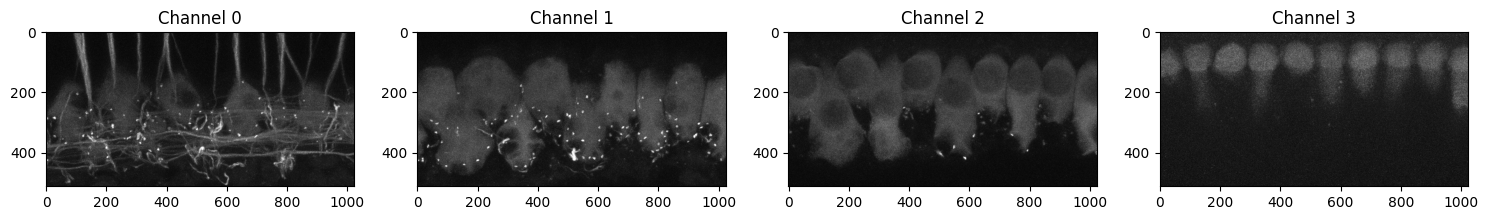

In [64]:
from bioio import BioImage
import bioio_lif
import bioio_tifffile

path = '/Users/leahashebir/Downloads/Manor_Practicum/image_libs/WPZ98L.CtBP2.GluR2.NF.Myo7.IHC.11.3.v1.lif'
img = BioImage(path)

print(f"Dimensions: {img.dims}")
print(f"Shape: {img.shape}")
print(f"Number of channels: {img.dims.C}")
print(f"Size of T dimension: {img.dims.T}")
print(f"Size of Z dimension: {img.dims.Z}")

# 3D visualization of z-stack ACROSS CHANNELS

channels = []
max_projections = []

# Loop through each channel
for c in range(img.dims.C):
    # Get data for this channel
    channel_data = img.get_image_data("ZYX", C=c, T=0)
    channels.append(channel_data)
    
    # Create max projection along Z-axis
    max_proj = np.max(channel_data, axis=0)
    max_projections.append(max_proj)

# tensor_dim_stack_normalized = (max_projections - max_projections.mean())/ (max_projections.std()+ 1e-8)

# input_tensor = torch.from_numpy(tensor_dim_stack_normalized).float()
input_tensor = torch.from_numpy(np.array(max_projections)).float()

# If you need to add batch dimension
input_tensor = input_tensor.unsqueeze(0)

plt.figure(figsize=(15, 5))
for i in range(len(max_projections)):
    plt.subplot(1, len(max_projections), i+1)
    plt.imshow(max_projections[i], cmap='gray')
    plt.title(f"Channel {i}")
plt.tight_layout()
plt.show()

# max_projections

Shape: (119, 4, 512, 1024)


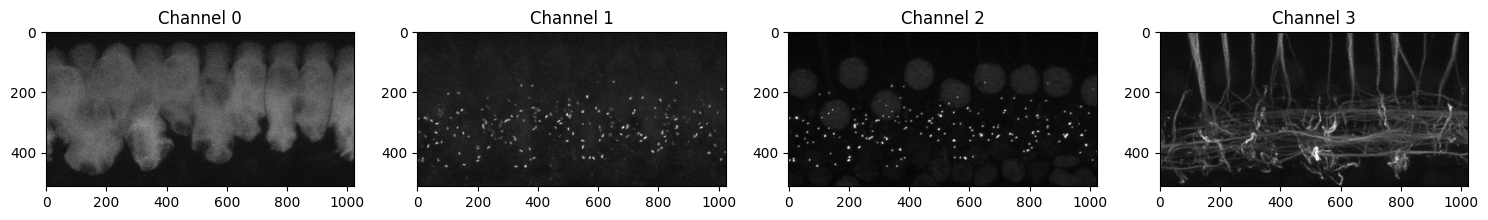

In [75]:
from bioio import BioImage
import bioio_lif
import bioio_tifffile
import tifffile

path = '/Users/leahashebir/Downloads/Manor_Practicum/image_libs/WPZ98L.CtBP2.GluR2.NF.Myo7.IHC.11.3.v1.tif'
# img = BioImage(path, reader=bioio_tifffile.Reader)

tiff_data = tifffile.imread(path)
print(f"Shape: {img.shape}")

# 3D visualization of z-stack ACROSS CHANNELS
max_projections = []
for c in range(img.shape[1]):
    channel_data = tiff_data[:, c, :, :] # all data per channel
    
    max_proj = np.max(channel_data, axis=0)
    max_projections.append(max_proj)

# input_tensor = torch.from_numpy(np.array(max_projections)).float()

# plt.figure(figsize=(15, 5))
# for i in range(len(max_projections)):
#     plt.subplot(1, len(max_projections), i+1)
#     plt.imshow(max_projections[i], cmap='gray')
#     plt.title(f"Channel {i}")
# plt.tight_layout()
# plt.show()

plt.figure(figsize=(15, 5))
for i in range(len(max_projections)):
    plt.subplot(1, len(max_projections), i+1)
    plt.imshow(max_projections[i], cmap='gray')
    plt.title(f"Channel {i}")
plt.tight_layout()
plt.show()

In [85]:
# from bioio import BioImage
# import bioio_lif
# import bioio_tifffile

# path = '/Users/leahashebir/Downloads/Manor_Practicum/image_libs/WPZ98L.CtBP2.GluR2.NF.Myo7.IHC.11.3.v1.lif'
# img = BioImage(path)

# print(f"Dimensions: {img.dims}")
# print(f"Shape: {img.shape}")
# print(f"Number of channels: {img.dims.C}")
# print(f"Size of T dimension: {img.dims.T}")
# print(f"Size of Z dimension: {img.dims.Z}")

# # 3D visualization of z-stack ACROSS CHANNELS

# channels = []
# max_projections = []

# # Loop through each channel
# for c in range(img.dims.C):
#     # Get data for this channel
#     channel_data = img.get_image_data("ZYX", C=c, T=0)
#     channels.append(channel_data)
    
#     # Create max projection along Z-axis
#     max_proj = np.max(channel_data, axis=0)
#     max_projections.append(max_proj)

# # tensor_dim_stack_normalized = (max_projections - max_projections.mean())/ (max_projections.std()+ 1e-8)

# # input_tensor = torch.from_numpy(tensor_dim_stack_normalized).float()
# input_tensor = torch.from_numpy(np.array(max_projections)).float()

# # If you need to add batch dimension
# input_tensor = input_tensor.unsqueeze(0)

# plt.figure(figsize=(15, 5))
# for i in range(len(max_projections)):
#     plt.subplot(1, len(max_projections), i+1)
#     plt.imshow(max_projections[i], cmap='gray')
#     plt.title(f"Channel {i}")
# plt.tight_layout()
# plt.show()

# # max_projections

In [29]:
# viewer = napari.Viewer()
# viewer.add_image(img.data)
# # Add the full image as a single layer (as you might have done initially)
# viewer.add_image(img.data, name='Full Stack')

# # Or add specific dimensions
# # Example: Add each Z-slice of channel 0 as separate layers
# z_stack = img.get_image_data("ZYX", C=0, T=0)
# for z in range(z_stack.shape[0]):
#     viewer.add_image(z_stack[z], name=f'Z-slice {z}')

# # Or add each channel as a separate layer with different colors
# channel_colors = ['red', 'green', 'blue', 'magenta', 'cyan']
# for c in range(min(img.dims.C, len(channel_colors))):
#     channel_data = img.get_image_data("ZYX", C=c, T=0)
#     viewer.add_image(
#         channel_data, 
#         name=f'Channel {c}',
#         blending='additive',
#         colormap=channel_colors[c])
    
# napari.run()

## 2) Run into NN

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(, (1,1, 1, 512,1024, 3)),
    torch.nn.ReLU()
    )

TypeError: empty(): argument 'size' failed to unpack the object at pos 2 with error "type must be tuple of ints,but got tuple"